In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [11]:
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/kaggle/input/insurance/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
df['sex'].replace(['male','female'],
                        [0, 1], inplace=True)
df['smoker'].replace(['no','yes'],
                        [0, 1], inplace=True)
df['region'].replace(['southwest', 'southeast', 'northwest', 'northeast'],
                        [0, 1,2,3], inplace=True)

<ipython-input-3-3dd7b680e652>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sex'].replace(['male','female'],
<ipython-input-3-3dd7b680e652>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'].replace(['male','female'],
<ipython-input-3-3dd7b680e652>:3: FutureWarning: A value is trying

In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


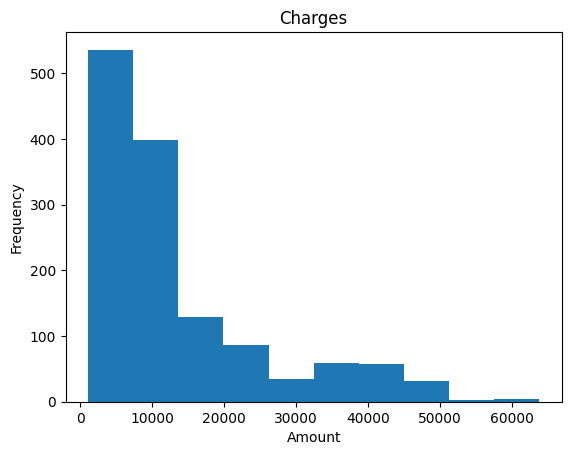

In [14]:
df['charges'].plot(kind='hist',title='Charges',xlabel='Amount')
plt.show()

<Axes: xlabel='age', ylabel='charges'>

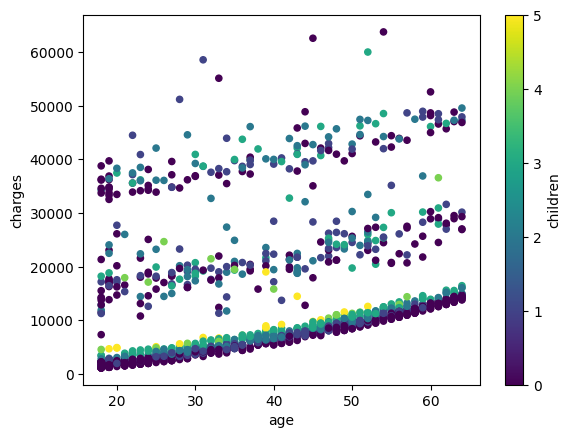

In [19]:
df.plot.scatter(x='age',y='charges',c='children',colormap='viridis')

In [20]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

<Axes: xlabel='age', ylabel='charges'>

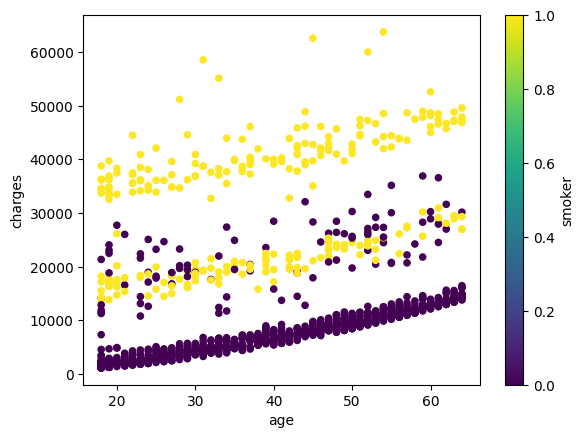

In [23]:
df.plot.scatter(x='age',y='charges',c='smoker',colormap='viridis')

<Axes: xlabel='age', ylabel='charges'>

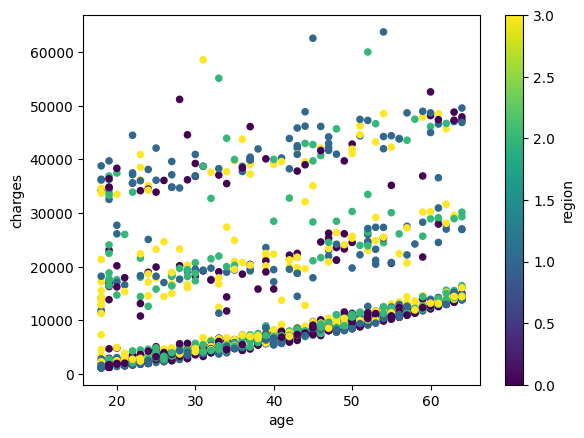

In [24]:
df.plot.scatter(x='age',y='charges',c='region',colormap='viridis')

<Axes: xlabel='bmi', ylabel='charges'>

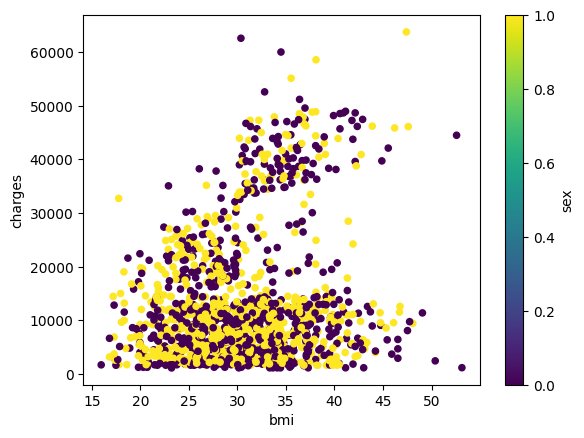

In [26]:
df.plot.scatter(x='bmi',y='charges',c='sex',colormap='viridis')

In [4]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


## Model Making

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X=df.drop(columns=['charges'])
y=df['charges']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

<Axes: ylabel='Frequency'>

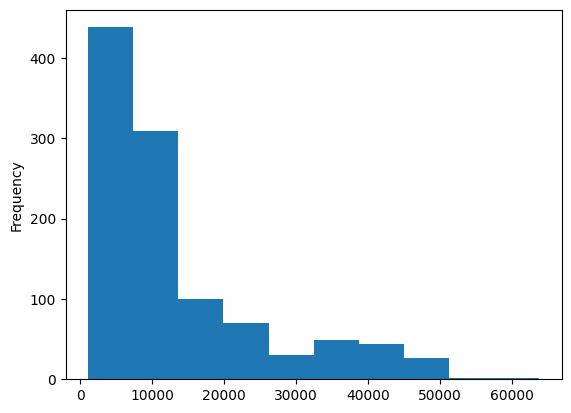

In [15]:
y_train.plot(kind='hist')

In [16]:
from sklearn.linear_model import LinearRegression as lr

In [18]:
reg = lr()
reg.fit(X_train,y_train)

LinearRegression()

In [19]:
preds=reg.predict(X_test)

In [23]:
from  sklearn.metrics import mean_squared_error,mean_absolute_error

In [24]:
mean_absolute_error(preds,y_test)

4056.118305662653

In [27]:
reg.score(X_train,y_train)

0.7475615631933097

In [29]:
reg.coef_

array([  258.01557886,   244.31610607,   315.08300514,   412.23885375,
       23766.9743197 ,   330.62676068])

In [ ]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))


In [30]:
import statsmodels.api as sm
from scipy import stats



X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     524.7
Date:                Thu, 23 Jan 2025   Prob (F-statistic):          1.40e-313
Time:                        14:32:10   Log-Likelihood:                -10839.
No. Observations:                1070   AIC:                         2.169e+04
Df Residuals:                    1063   BIC:                         2.173e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.245e+04   1157.198    -10.756      0.0

In [37]:
X=df[['age','bmi','smoker','children']]
y=df['charges']

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [39]:
import statsmodels.api as sm
from scipy import stats



X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     784.3
Date:                Thu, 23 Jan 2025   Prob (F-statistic):          1.44e-315
Time:                        14:39:21   Log-Likelihood:                -10841.
No. Observations:                1070   AIC:                         2.169e+04
Df Residuals:                    1065   BIC:                         2.172e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.149e+04   1056.740    -10.876      0.0

In [41]:
est2.params()

TypeError: 'Series' object is not callable